In [ ]:
from google.colab import drive
drive.mount('./MyDrive')

In [ ]:
pwd

'/content'

In [ ]:
cd /content/MyDrive/MyDrive/dataset

/content/MyDrive/MyDrive/dataset


In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
import numpy as np

In [ ]:
# data augmentation
trdata = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True, validation_split=0.2)


traindata = trdata.flow_from_directory(directory="./dogsandcats",   target_size=(224,224), subset='training') 
# flow_from_directory

valdata = trdata.flow_from_directory(directory="./dogsandcats",   target_size=(224,224),subset="validation" ,)




Found 388 images belonging to 2 classes.
Found 96 images belonging to 2 classes.


Transfer Learning

 https://github.com/tensorflow/tensorflow/blob/v2.3.1/tensorflow/python/keras/applications/vgg16.py#L45-L225

 https://www.tensorflow.org/api_docs/python/tf/keras/applications/VGG16

In [ ]:
VGG = VGG16(input_shape=(224,224,3), include_top = False, weights = 'imagenet')
# include_top = False >> 모델링만 가져오기 위함 
VGG.trainable = True # 1 False # 2      
# trainable = True 학습(훈련)하여 업데이트 함 # trainable = False 학습 하지 않고 분류기로만 사용 

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
VGG.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

VGG Architecture

In [ ]:
# model = Sequential()

# model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

# model.add(Flatten())
# model.add(Dense(units=4096,activation="relu"))
# model.add(Dense(units=4096,activation="relu"))
# model.add(Dense(units=2, activation="softmax"))


VGG + Classifier

In [ ]:
model = Sequential()
model.add(VGG)
model.add(Flatten())
model.add(Dense(units=256,activation="relu"))
model.add(Dense(units=256,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [ ]:
from keras.optimizers import Adam

model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               6422784   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 514       
Total params: 21,203,778
Trainable params: 21,203,778
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(traindata, epochs = 10,   validation_data=valdata,)

Epoch 1/10
13/13 [==============================] - 146s 9s/step - loss: 5.1144 - accuracy: 0.5250 - val_loss: 0.7047 - val_accuracy: 0.5000
Epoch 2/10
13/13 [==============================] - 8s 577ms/step - loss: 0.7058 - accuracy: 0.4941 - val_loss: 0.6707 - val_accuracy: 0.5417
Epoch 3/10
13/13 [==============================] - 8s 574ms/step - loss: 0.7039 - accuracy: 0.4970 - val_loss: 0.7208 - val_accuracy: 0.5000
Epoch 4/10
13/13 [==============================] - 7s 561ms/step - loss: 0.6872 - accuracy: 0.5543 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 5/10
13/13 [==============================] - 8s 574ms/step - loss: 0.6954 - accuracy: 0.4821 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
13/13 [==============================] - 7s 556ms/step - loss: 0.6910 - accuracy: 0.5252 - val_loss: 0.6964 - val_accuracy: 0.5000
Epoch 7/10
13/13 [==============================] - 8s 574ms/step - loss: 0.6922 - accuracy: 0.5183 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 8

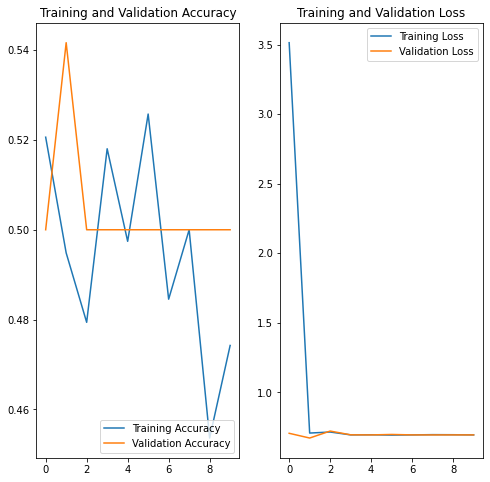

In [ ]:
import matplotlib.pyplot as plt
epochs=10
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

2번이 더 높게 나옴 (data의 양이 적기 때문)